In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import os

In [4]:
img_dirs = []
for entry in os.scandir("./images/train"):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [24]:
img_dirs
header = ['emotion', 'pixel array']
data = []
for img_dir in img_dirs:
    for entry in os.scandir(img_dir):
        new_entry = []
        emotion = img_dir.split('/')
        new_entry.append(emotion[3])
        new_img = cv2.imread(entry.path)
        new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
        new_entry.append(new_img)
        data.append(new_entry)
        

In [7]:
img = cv2.imread('./images/train/happy/14.jpg')
img.shape

(48, 48, 3)

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(48, 48)

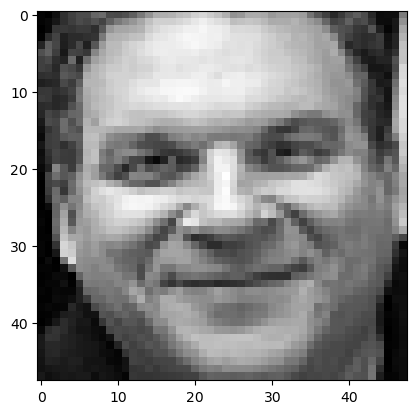

In [11]:
plt.imshow(gray, cmap='gray')

In [13]:
gray

array([[  4,   0,  14, ...,  12,  12, 106],
       [  4,   8,  20, ...,  10,  21, 126],
       [  0,   7,  47, ...,   5,  20, 144],
       ...,
       [ 17,  30,  29, ...,   0,  10,  12],
       [ 15,  19,  22, ...,   1,   8,  12],
       [ 22,  13,  18, ...,   4,   5,  12]], dtype=uint8)

In [14]:
img_dirs

['./images/train/happy',
 './images/train/sad',
 './images/train/fear',
 './images/train/surprise',
 './images/train/neutral',
 './images/train/angry',
 './images/train/disgust']

In [15]:
img_dirs[1]

'./images/train/sad'

In [17]:
txt = img_dirs[1]
split_test = txt.split('/')

In [25]:
split_test[3]

'sad'

In [27]:
data

[['happy',
  array([[183, 184, 183, ..., 101, 100,  96],
         [185, 183, 186, ...,  99, 100,  99],
         [189, 185, 187, ...,  96,  98, 100],
         ...,
         [ 51,  54,  46, ...,  42,  45,  37],
         [ 56,  55,  33, ...,  50,  46,  18],
         [ 54,  47,  38, ...,  49,  47,  39]], dtype=uint8)],
 ['happy',
  array([[242, 253, 254, ..., 245, 240, 243],
         [242, 245, 245, ..., 244, 248, 244],
         [244, 241, 240, ..., 246, 243, 241],
         ...,
         [250, 250, 251, ..., 246, 237, 241],
         [250, 248, 245, ..., 242, 244, 242],
         [236, 236, 236, ..., 249, 239, 241]], dtype=uint8)],
 ['happy',
  array([[115, 126, 122, ..., 211, 212, 212],
         [116, 128, 139, ..., 212, 212, 212],
         [132, 125, 132, ..., 212, 212, 212],
         ...,
         [177, 175, 176, ..., 210, 212, 211],
         [173, 171, 172, ..., 211, 210, 211],
         [170, 171, 171, ..., 213, 209, 211]], dtype=uint8)],
 ['happy',
  array([[164, 175, 177, ..., 248, 250

In [28]:
import csv

In [30]:
header

['emotion', 'pixel array']

In [31]:
filename = 'emotion_array.csv'

In [33]:
with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(header)
    csvwriter.writerows(data)

In [34]:
import pandas as pd

In [35]:
csv_data = pd.read_csv('emotion_array.csv')

In [37]:
csv_data

,emotion,pixel array
0,happy,[[183 184 183 ... 101 100 96]\n [185 183 186 ...
1,happy,[[242 253 254 ... 245 240 243]\n [242 245 245 ...
2,happy,[[115 126 122 ... 211 212 212]\n [116 128 139 ...
3,happy,[[164 175 177 ... 248 250 247]\n [166 168 171 ...
4,happy,[[253 254 240 ... 65 65 70]\n [254 255 237 ...
...,...,...
28816,disgust,[[254 255 253 ... 196 194 189]\n [255 255 253 ...
28817,disgust,[[254 255 253 ... 196 194 189]\n [255 255 253 ...
28818,disgust,[[ 40 42 36 ... 142 182 220]\n [ 39 39 31 ...
28819,disgust,[[255 243 230 ... 57 59 63]\n [252 253 230 ...


In [38]:
csv_data.dtypes

emotion        object
pixel array    object
dtype: object

In [39]:
csv_data.shape

(28821, 2)

In [40]:
csv_data.attribute

AttributeError: 'DataFrame' object has no attribute 'attribute'

In [41]:
csv_data.columns

Index(['emotion', 'pixel array'], dtype='object')

In [42]:
csv_data['pixel array'].describe()

count                                                 28821
unique                                                27544
top       [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
freq                                                     18
Name: pixel array, dtype: object

In [43]:
csv_data['pixel array'].min()

'[[  0   0   0 ...   0   0   0]\n [  0   0   0 ...   0   0   0]\n [  0   0   0 ...   0   0   0]\n ...\n [  0   0   0 ...   0   8   0]\n [  0   0   0 ...  37   1   0]\n [  0   0   0 ... 136  12   2]]'

In [44]:
csv_data['pixel array']

0        [[183 184 183 ... 101 100  96]\n [185 183 186 ...
1        [[242 253 254 ... 245 240 243]\n [242 245 245 ...
2        [[115 126 122 ... 211 212 212]\n [116 128 139 ...
3        [[164 175 177 ... 248 250 247]\n [166 168 171 ...
4        [[253 254 240 ...  65  65  70]\n [254 255 237 ...
                               ...                        
28816    [[254 255 253 ... 196 194 189]\n [255 255 253 ...
28817    [[254 255 253 ... 196 194 189]\n [255 255 253 ...
28818    [[ 40  42  36 ... 142 182 220]\n [ 39  39  31 ...
28819    [[255 243 230 ...  57  59  63]\n [252 253 230 ...
28820    [[ 70  84 107 ... 157 160 156]\n [ 71  81 105 ...
Name: pixel array, Length: 28821, dtype: object

In [ ]:
`